In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

Using TensorFlow backend.
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
import numpy as np

def vectorize_sequence(sequence, dimension=5000):
    results = np.zeros((len(sequence), dimension), dtype=np.float32)
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512,
                   validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 763us/step - loss: 0.4957 - accuracy: 0.7878 - val_loss: 0.3734 - val_accuracy: 0.8660
Epoch 2/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3128 - accuracy: 0.8905 - val_loss: 0.3066 - val_accuracy: 0.8830
Epoch 3/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.2466 - accuracy: 0.9115 - val_loss: 0.3576 - val_accuracy: 0.8494
Epoch 4/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.2135 - accuracy: 0.9213 - val_loss: 0.2930 - val_accuracy: 0.8818
Epoch 5/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.1899 - accuracy: 0.9318 - val_loss: 0.2974 - val_accuracy: 0.8791
Epoch 6/20
15000/15000 [==============================] - 1s 47us/step - loss: 0.1672 - accuracy: 0.9410 - val_loss: 0.2964 - val_accuracy: 0.8809
Epoch 7/20
15000/15000 [==============================] - 1s 51us

In [8]:
from keras import models
from keras import layers

model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(5000,)))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history4 = model4.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.6341 - accuracy: 0.7399 - val_loss: 0.5766 - val_accuracy: 0.8191
Epoch 2/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.5145 - accuracy: 0.8631 - val_loss: 0.4791 - val_accuracy: 0.8584
Epoch 3/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.4259 - accuracy: 0.8829 - val_loss: 0.4117 - val_accuracy: 0.8640
Epoch 4/20
15000/15000 [==============================] - 1s 49us/step - loss: 0.3604 - accuracy: 0.8926 - val_loss: 0.3643 - val_accuracy: 0.8726
Epoch 5/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.3116 - accuracy: 0.9033 - val_loss: 0.3378 - val_accuracy: 0.8732
Epoch 6/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.2757 - accuracy: 0.9118 - val_loss: 0.3146 - val_accuracy: 0.8808
Epoch 7/20
15000/15000 [==============================] - 1s 60us/

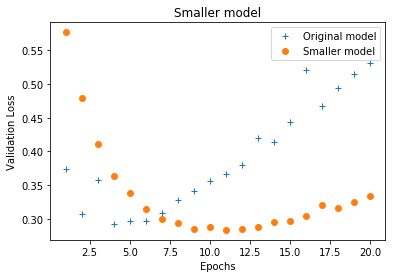

In [13]:
import matplotlib.pyplot as plt

val_loss_values = history.history['val_loss']
val_loss_values4 = history4.history['val_loss']

epochs = range(1, len(val_loss_values)+1)

plt.plot(epochs, val_loss_values, '+', label='Original model')
plt.plot(epochs, val_loss_values4, 'o', label='Smaller model')
plt.title('Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [14]:
from keras import models
from keras import layers

model512 = models.Sequential()
model512.add(layers.Dense(512, activation='relu', input_shape=(5000,)))
model512.add(layers.Dense(512, activation='relu'))
model512.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model512.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history512 = model512.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 19s 1ms/step - loss: 0.5652 - accuracy: 0.7388 - val_loss: 0.3294 - val_accuracy: 0.8754
Epoch 2/20
15000/15000 [==============================] - 7s 458us/step - loss: 0.2824 - accuracy: 0.8878 - val_loss: 0.2787 - val_accuracy: 0.8834
Epoch 3/20
15000/15000 [==============================] - 6s 374us/step - loss: 0.1945 - accuracy: 0.9223 - val_loss: 0.3074 - val_accuracy: 0.8772
Epoch 4/20
15000/15000 [==============================] - 6s 369us/step - loss: 0.1089 - accuracy: 0.9617 - val_loss: 0.2978 - val_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 7s 458us/step - loss: 0.0840 - accuracy: 0.9756 - val_loss: 0.3455 - val_accuracy: 0.8849
Epoch 6/20
15000/15000 [==============================] - 6s 407us/step - loss: 0.0054 - accuracy: 0.9993 - val_loss: 0.4613 - val_accuracy: 0.8837
Epoch 7/20
15000/15000 [==============================] - 7s 48

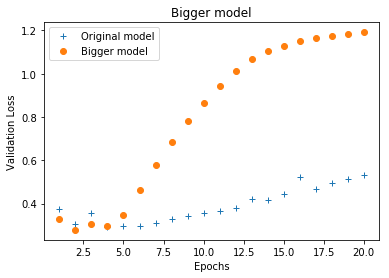

In [18]:
import matplotlib.pyplot as plt

val_loss_values = history.history['val_loss']
val_loss_values512 = history512.history['val_loss']

epochs = range(1, len(val_loss_values)+1)

plt.plot(epochs, val_loss_values, '+', label='Original model')
plt.plot(epochs, val_loss_values512, 'o', label='Bigger model')
plt.title('Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

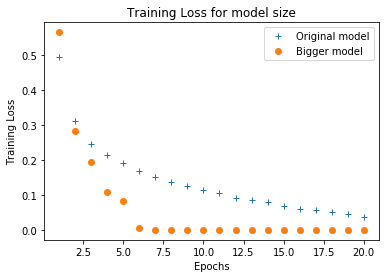

In [19]:
import matplotlib.pyplot as plt

loss_values = history.history['loss']
loss_values512 = history512.history['loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, '+', label='Original model')
plt.plot(epochs, loss_values512, 'o', label='Bigger model')
plt.title('Training Loss for model size')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()